In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import itertools
from scipy.stats import pearsonr

from fit import get_expectations_carrabin
palette = sns.color_palette('tab10')
sns.set_palette(palette)
sns.set(context='paper', style='white', font="cmr10", font_scale=1.2)
plt.rcParams['axes.formatter.use_mathtext'] = True

### Reproduce Carrabin Fig 3

In [6]:
human = pd.read_pickle("data/carrabin.pkl")
bayes = pd.read_pickle("data/bayes_jan24_dynamics.pkl")

In [7]:
human['bayes'] = bayes['response']
bayes['bayes'] = bayes['response']
combined = pd.concat([human, bayes], ignore_index=True)

In [6]:
combined

type  sid  trial  stage  color  response  delta response     bayes
0      human    1      1      1      1  0.500000           0.500  0.333333
1      human    1      1      2     -1  0.000000           0.500  0.000000
2      human    1      1      3     -1 -0.500000           0.500 -0.200000
3      human    1      1      4     -1 -0.598000           0.098 -0.333333
4      human    1      1      5     -1 -0.800000           0.202 -0.428571
...      ...  ...    ...    ...    ...       ...             ...       ...
41505  bayes   21    200      1      1  0.333333             NaN  0.333333
41506  bayes   21    200      2      1  0.500000             NaN  0.500000
41507  bayes   21    200      3      1  0.600000             NaN  0.600000
41508  bayes   21    200      4      1  0.666667             NaN  0.666667
41509  bayes   21    200      5      1  0.714286             NaN  0.714286

[41510 rows x 8 columns]

/tmp/ipykernel_5992/3530315094.py:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.lineplot(data=combined, x='bayes', y='response', hue='type', ax=ax, palette=palette)


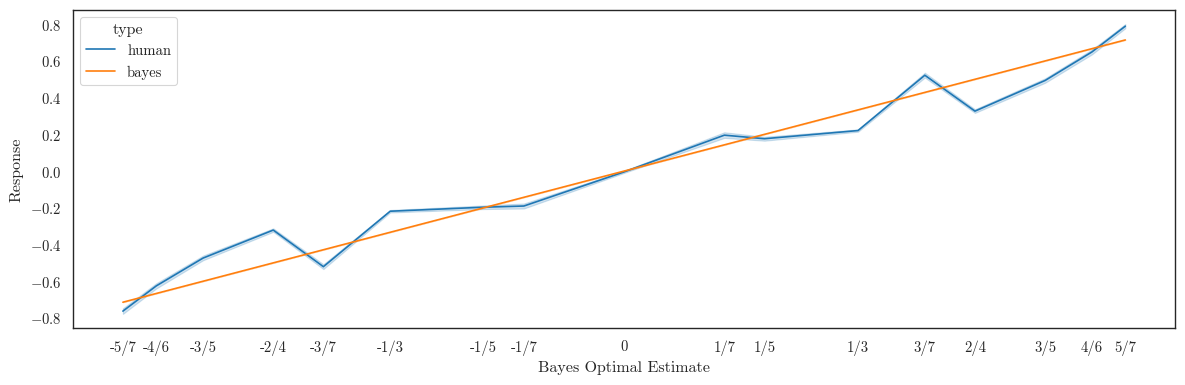

In [7]:
fig, ax = plt.subplots(figsize=(12,4))
# labels = ['1/7', '1/6', '1/5', '1/4', '2/7', '1/3', '2/5', '3/7', '1/2', '4/7', '3/5', '2/3', '5/7', '3/4', '4/5', '5/6', '6/7']
xticks = [-5/7, -4/6, -3/5, -2/4, -3/7, -1/3, -1/5, -1/7, 0, 1/7, 1/5, 1/3, 3/7, 2/4, 3/5, 4/6, 5/7]
labels = ['-5/7', '-4/6', '-3/5', '-2/4', '-3/7', '-1/3', '-1/5', '-1/7', '0', '1/7', '1/5', '1/3', '3/7', '2/4', '3/5', '4/6', '5/7']
sns.lineplot(data=combined, x='bayes', y='response', hue='type', ax=ax, palette=palette)
ax.set(xlabel='Bayes Optimal Estimate', xticks=xticks, xticklabels=labels, ylabel='Response')
plt.tight_layout()
plt.show()

### RMSE

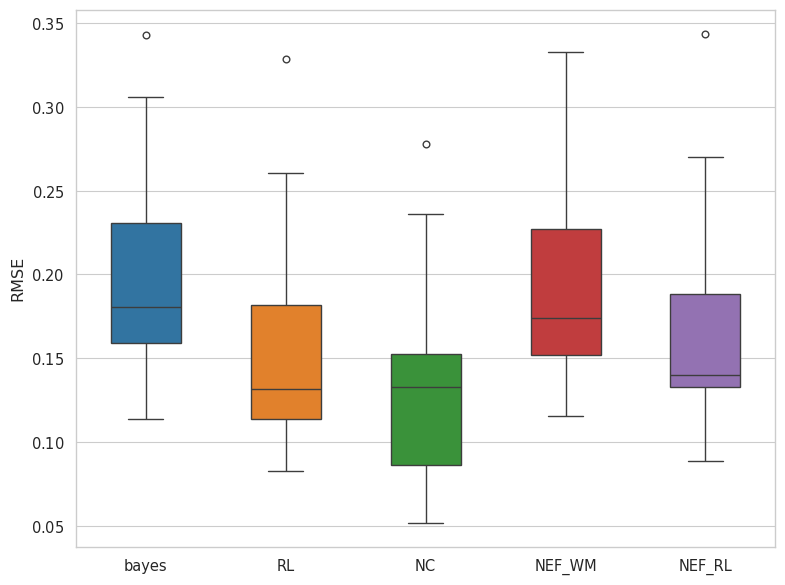

In [42]:
bayes = pd.read_pickle("data/bayes_jan24_performance.pkl")
rl = pd.read_pickle("data/RL_jan27_performance.pkl")
nc = pd.read_pickle("data/NC_jan27_performance.pkl")
rl_n = pd.read_pickle("data/RL_n2_jan28two_performance.pkl")
nc_n = pd.read_pickle("data/NC_n2_jan28two_performance.pkl")
nef_wm = pd.read_pickle("data/NEF_WM_carrabin_jan29two_performance.pkl")
# nef_rl = pd.read_pickle("data/NEF_RL_carrabin_jan29two_performance.pkl")
# nef_wm = pd.read_pickle("data/NEF_WM_carrabin_jan30_performance.pkl")
nef_rl = pd.read_pickle("data/NEF_RL_carrabin_jan30_performance.pkl")
combined = pd.concat([bayes, rl, nc, nef_wm, nef_rl], ignore_index=True)
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6), sharex=True, sharey='row')
    sns.boxplot(combined, x='type', y='RMSE', hue='type', ax=ax, palette=palette[:5], notch=False, width=0.5)
    ax.set(xlabel=None, ylabel='RMSE') 
    plt.tight_layout()
    fig.savefig("plots/carrabin_RMSE.jpg", dpi=600)

### Autocorrelation

In [30]:
def array_to_binary(arr):
    arr = (arr == 1).astype(int)
    binary_str = ''.join(arr.astype(str))
    return binary_str

In [45]:
human = pd.read_pickle("data/carrabin.pkl")
bayes = pd.read_pickle("data/bayes_jan24_dynamics.pkl")
rl = pd.read_pickle("data/RL_jan27_dynamics.pkl")
nc = pd.read_pickle("data/NC_jan27_dynamics.pkl")
# nef_wm = pd.read_pickle("data/NEF_WM_carrabin_jan29two_dynamics.pkl")
# nef_rl = pd.read_pickle("data/NEF_RL_carrabin_jan29two_dynamics.pkl")
nef_wm = pd.read_pickle("data/NEF_WM_carrabin_jan30_dynamics.pkl")
nef_rl = pd.read_pickle("data/NEF_RL_carrabin_jan30_dynamics.pkl")
human['bayes'] = bayes['response']
human['bias'] = human['response'] - human['bayes']
bayes['bayes'] = human['bayes']
bayes['bias'] = bayes['response'] - bayes['response']
rl['bayes'] = human['bayes']
rl['bias'] = rl['response'] - human['bayes']
nc['bayes'] = human['bayes']
nc['bias'] = nc['response'] - human['bayes']
nef_wm['bayes'] = human['bayes']
nef_wm['bias'] = nef_wm['response'] - human['bayes']
nef_rl['bayes'] = human['bayes']
nef_rl['bias'] = nef_rl['response'] - human['bayes']
combined = pd.concat([human, bayes, rl, nc, nef_wm, nef_rl], ignore_index=True)

In [46]:
combined

type  sid  trial  stage  color  response  delta response     bayes  \
0        human    1      1      1      1  0.500000        0.500000  0.333333   
1        human    1      1      2     -1  0.000000        0.500000  0.000000   
2        human    1      1      3     -1 -0.500000        0.500000 -0.200000   
3        human    1      1      4     -1 -0.598000        0.098000 -0.333333   
4        human    1      1      5     -1 -0.800000        0.202000 -0.428571   
...        ...  ...    ...    ...    ...       ...             ...       ...   
124525  NEF_RL   21    200      1      1  0.144687        0.144687  0.333333   
124526  NEF_RL   21    200      2      1  0.281927        0.137240  0.500000   
124527  NEF_RL   21    200      3      1  0.404645        0.122718  0.600000   
124528  NEF_RL   21    200      4      1  0.503565        0.098920  0.666667   
124529  NEF_RL   21    200      5      1  0.566389        0.062824  0.714286   

            bias  
0       0.166667  
1       0.000000  
2      -0.300000  
3      -0.264667  
4      -0.371429  
...          ...  
124525 -0.188646  
124526 -0.218073  
124527 -0.195355  
124528 -0.163101  
124529 -0.147897  

[124530 rows x 9 columns]

### Preprocess data

In [33]:
dfs = []
columns = ['type', 'sid', 'qid', 'mean estimate']
for mt in combined['type'].unique():
    for sid in combined['sid'].unique():
        print(mt, sid)
        seq_dict = {}
        for stage in range(1, 6):
            sequences = np.array(list(itertools.product([1,-1], repeat=stage)))
            for seq in sequences:
                qid = array_to_binary(seq)
                seq_dict[qid] = []
        for trial in combined.query("type==@mt & sid==@sid")['trial'].unique():
            for stage in combined.query("type==@mt & sid==@sid & trial==@trial")['stage'].unique():
                sequence = combined.query("type==@mt & sid==@sid & trial==@trial & stage<=@stage")['color'].to_numpy()
                estimate = combined.query("type==@mt & sid==@sid & trial==@trial & stage==@stage")['response'].to_numpy()[0]
                qid = array_to_binary(sequence)
                seq_dict[qid].append(estimate)
                # print(sid, trial, stage, sequence, qid)
        for qid, seq in seq_dict.items():
            if len(seq)>0:
                dfs.append(pd.DataFrame([[mt, sid, qid, np.mean(seq)]], columns=columns))
avg_estimates = pd.concat(dfs, ignore_index=True)
avg_estimates.to_pickle("data/avg_estimates.pkl")

human 1
human 2
human 3
human 4
human 5
human 6
human 7
human 8
human 9
human 10
human 11
human 12
human 13
human 14
human 15
human 16
human 17
human 18
human 19
human 20
human 21
bayes 1
bayes 2
bayes 3
bayes 4
bayes 5
bayes 6
bayes 7
bayes 8
bayes 9
bayes 10
bayes 11
bayes 12
bayes 13
bayes 14
bayes 15
bayes 16
bayes 17
bayes 18
bayes 19
bayes 20
bayes 21
RL 1
RL 2
RL 3
RL 4
RL 5
RL 6
RL 7
RL 8
RL 9
RL 10
RL 11
RL 12
RL 13
RL 14
RL 15
RL 16
RL 17
RL 18
RL 19
RL 20
RL 21
NC 1
NC 2
NC 3
NC 4
NC 5
NC 6
NC 7
NC 8
NC 9
NC 10
NC 11
NC 12
NC 13
NC 14
NC 15
NC 16
NC 17
NC 18
NC 19
NC 20
NC 21
NEF_WM 1
NEF_WM 2
NEF_WM 3
NEF_WM 4
NEF_WM 5
NEF_WM 6
NEF_WM 7
NEF_WM 8
NEF_WM 9
NEF_WM 10
NEF_WM 11
NEF_WM 12
NEF_WM 13
NEF_WM 14
NEF_WM 15
NEF_WM 16
NEF_WM 17
NEF_WM 18
NEF_WM 19
NEF_WM 20
NEF_WM 21
NEF_RL 1
NEF_RL 2
NEF_RL 3
NEF_RL 4
NEF_RL 5
NEF_RL 6
NEF_RL 7
NEF_RL 8
NEF_RL 9
NEF_RL 10
NEF_RL 11
NEF_RL 12
NEF_RL 13
NEF_RL 14
NEF_RL 15
NEF_RL 16
NEF_RL 17
NEF_RL 18
NEF_RL 19
NEF_RL 20
NEF_RL 21


In [34]:
avg_estimates

type  sid    qid  mean estimate
0      human    1      1       0.127842
1      human    1      0      -0.119778
2      human    1     11       0.263433
3      human    1     10       0.004780
4      human    1     01       0.002979
...      ...  ...    ...            ...
7711  NEF_RL   21  00100      -0.344716
7712  NEF_RL   21  00011       0.005793
7713  NEF_RL   21  00010      -0.343279
7714  NEF_RL   21  00001      -0.292569
7715  NEF_RL   21  00000      -0.585258

[7716 rows x 4 columns]

In [35]:
dfs = []
columns = ['type', 'sid', 'qid', 'stage', 'excursion', 'previous excursion']
for mt in combined['type'].unique():
    for sid in combined['sid'].unique():
        print(mt, sid)
        for trial in combined.query("type==@mt & sid==@sid")['trial'].unique():
            excursion_old = None
            for stage in combined.query("type==@mt & sid==@sid & trial==@trial")['stage'].unique():
                sequence = combined.query("type==@mt & sid==@sid & trial==@trial & stage<=@stage")['color'].to_numpy()
                estimate = combined.query("type==@mt & sid==@sid & trial==@trial & stage==@stage")['response'].to_numpy()[0]
                qid = array_to_binary(sequence)
                avg_est = avg_estimates.query("type==@mt & sid==@sid & qid==@qid")['mean estimate'].unique()[0]
                excursion = np.around(estimate - avg_est, 4)
                # print(mt, sid, trial, stage, estimate, avg_est, excursion)
                dfs.append(pd.DataFrame([[mt, sid, qid, stage, excursion, excursion_old]], columns=columns))
                excursion_old = excursion
excursions = pd.concat(dfs, ignore_index=True)
excursions.to_pickle("data/excursions.pkl")

human 1
human 2
human 3
human 4
human 5
human 6
human 7
human 8
human 9
human 10
human 11
human 12
human 13
human 14
human 15
human 16
human 17
human 18
human 19
human 20
human 21
bayes 1
bayes 2
bayes 3
bayes 4
bayes 5
bayes 6
bayes 7
bayes 8
bayes 9
bayes 10
bayes 11
bayes 12
bayes 13
bayes 14
bayes 15
bayes 16
bayes 17
bayes 18
bayes 19
bayes 20
bayes 21
RL 1
RL 2
RL 3
RL 4
RL 5
RL 6
RL 7
RL 8
RL 9
RL 10
RL 11
RL 12
RL 13
RL 14
RL 15
RL 16
RL 17
RL 18
RL 19
RL 20
RL 21
NC 1
NC 2
NC 3
NC 4
NC 5
NC 6
NC 7
NC 8
NC 9
NC 10
NC 11
NC 12
NC 13
NC 14
NC 15
NC 16
NC 17
NC 18
NC 19
NC 20
NC 21
NEF_WM 1
NEF_WM 2
NEF_WM 3
NEF_WM 4
NEF_WM 5
NEF_WM 6
NEF_WM 7
NEF_WM 8
NEF_WM 9
NEF_WM 10
NEF_WM 11
NEF_WM 12
NEF_WM 13
NEF_WM 14
NEF_WM 15
NEF_WM 16
NEF_WM 17
NEF_WM 18
NEF_WM 19
NEF_WM 20
NEF_WM 21
NEF_RL 1
NEF_RL 2
NEF_RL 3
NEF_RL 4
NEF_RL 5
NEF_RL 6
NEF_RL 7
NEF_RL 8
NEF_RL 9
NEF_RL 10
NEF_RL 11
NEF_RL 12
NEF_RL 13
NEF_RL 14
NEF_RL 15
NEF_RL 16
NEF_RL 17
NEF_RL 18
NEF_RL 19
NEF_RL 20
NEF_RL 21


/tmp/ipykernel_38144/413514224.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  excursions = pd.concat(dfs, ignore_index=True)


In [36]:
excursions

type  sid    qid  stage  excursion  previous excursion
0        human    1      1      1     0.3722                 NaN
1        human    1     10      2    -0.0048              0.3722
2        human    1    100      3    -0.3466             -0.0048
3        human    1   1000      4    -0.2880             -0.3466
4        human    1  10000      5    -0.2377             -0.2880
...        ...  ...    ...    ...        ...                 ...
124525  NEF_RL   21      1      1    -0.0171                 NaN
124526  NEF_RL   21     11      2    -0.0315             -0.0171
124527  NEF_RL   21    111      3    -0.0257             -0.0315
124528  NEF_RL   21   1111      4    -0.0152             -0.0257
124529  NEF_RL   21  11111      5    -0.0287             -0.0152

[124530 rows x 6 columns]

In [37]:
dfs = []
columns = ['type', 'sid', 'stage', 'lag', 'correlation']
for mt in combined['type'].unique():
    for sid in combined['sid'].unique():
        print(mt, sid)
        for stage in range(2,6):
            exc = excursions.query("type==@mt & sid==@sid & stage==@stage")['excursion'].to_numpy()
            for lag in range(1,stage):
                lagged_stage = stage - lag
                lagged_exc = excursions.query("type==@mt & sid==@sid & stage==@lagged_stage")['excursion'].to_numpy()
                if np.sum(np.abs(exc))==0 and np.sum(np.abs(lagged_exc))==0:
                    corr_coefficient = 0
                else:
                    corr_coefficient, p_value = pearsonr(exc, lagged_exc)
                dfs.append(pd.DataFrame([[mt, sid, stage, lag, corr_coefficient]], columns=columns))
coefficients = pd.concat(dfs, ignore_index=True)
coefficients.to_pickle("data/coefficients.pkl")

human 1
human 2
human 3
human 4
human 5
human 6
human 7
human 8


/tmp/ipykernel_38144/824026367.py:14: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_coefficient, p_value = pearsonr(exc, lagged_exc)
/tmp/ipykernel_38144/824026367.py:14: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_coefficient, p_value = pearsonr(exc, lagged_exc)
/tmp/ipykernel_38144/824026367.py:14: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_coefficient, p_value = pearsonr(exc, lagged_exc)
/tmp/ipykernel_38144/824026367.py:14: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_coefficient, p_value = pearsonr(exc, lagged_exc)


human 9
human 10
human 11
human 12
human 13
human 14
human 15
human 16
human 17
human 18
human 19
human 20
human 21
bayes 1
bayes 2
bayes 3
bayes 4
bayes 5
bayes 6
bayes 7
bayes 8
bayes 9
bayes 10
bayes 11
bayes 12
bayes 13
bayes 14
bayes 15
bayes 16
bayes 17
bayes 18
bayes 19
bayes 20
bayes 21
RL 1
RL 2
RL 3
RL 4
RL 5
RL 6
RL 7
RL 8
RL 9
RL 10
RL 11
RL 12
RL 13
RL 14
RL 15
RL 16
RL 17
RL 18
RL 19
RL 20
RL 21
NC 1
NC 2
NC 3
NC 4
NC 5
NC 6
NC 7
NC 8
NC 9
NC 10
NC 11
NC 12
NC 13
NC 14
NC 15
NC 16
NC 17
NC 18
NC 19
NC 20
NC 21
NEF_WM 1
NEF_WM 2
NEF_WM 3
NEF_WM 4
NEF_WM 5
NEF_WM 6
NEF_WM 7
NEF_WM 8
NEF_WM 9
NEF_WM 10
NEF_WM 11
NEF_WM 12
NEF_WM 13
NEF_WM 14
NEF_WM 15
NEF_WM 16
NEF_WM 17
NEF_WM 18
NEF_WM 19
NEF_WM 20
NEF_WM 21
NEF_RL 1
NEF_RL 2
NEF_RL 3
NEF_RL 4
NEF_RL 5
NEF_RL 6
NEF_RL 7
NEF_RL 8
NEF_RL 9
NEF_RL 10
NEF_RL 11
NEF_RL 12
NEF_RL 13
NEF_RL 14
NEF_RL 15
NEF_RL 16
NEF_RL 17
NEF_RL 18
NEF_RL 19
NEF_RL 20
NEF_RL 21


# Plot

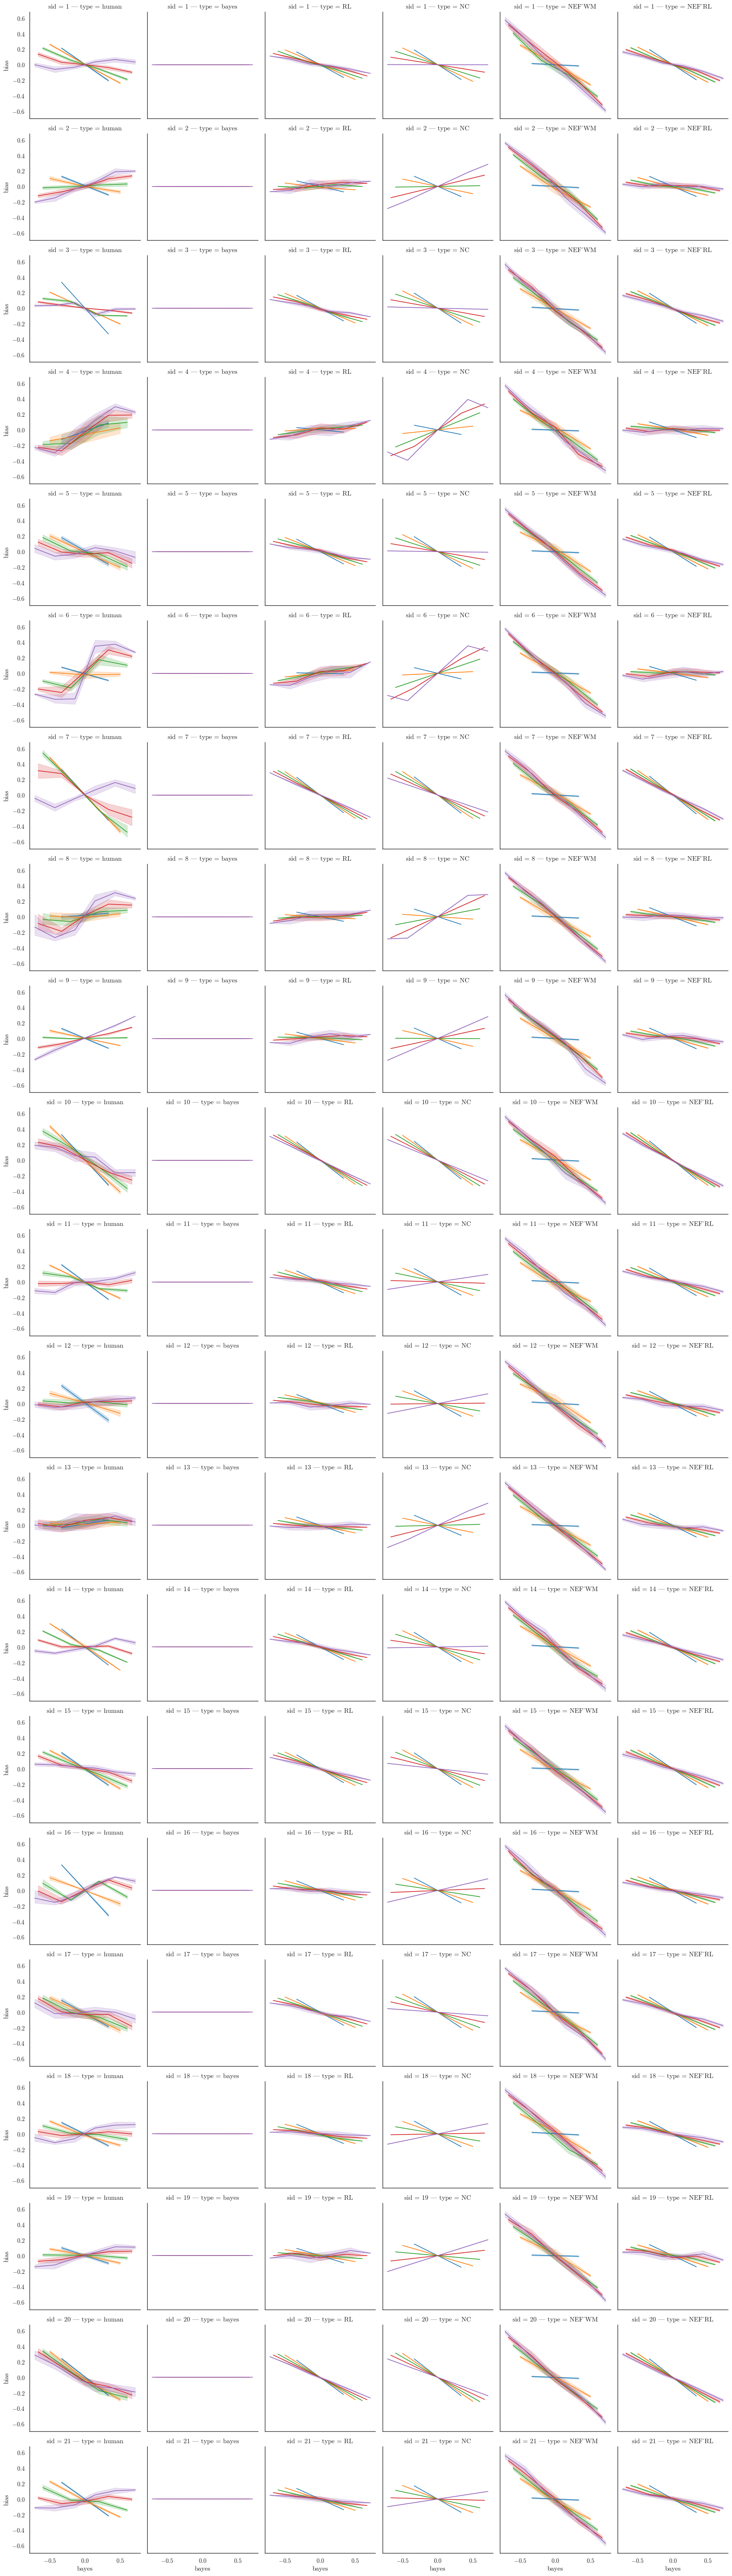

In [38]:
g = sns.FacetGrid(combined, row="sid", col='type')
g.map_dataframe(sns.lineplot, x='bayes', y='bias', hue='stage', palette=palette[:5])

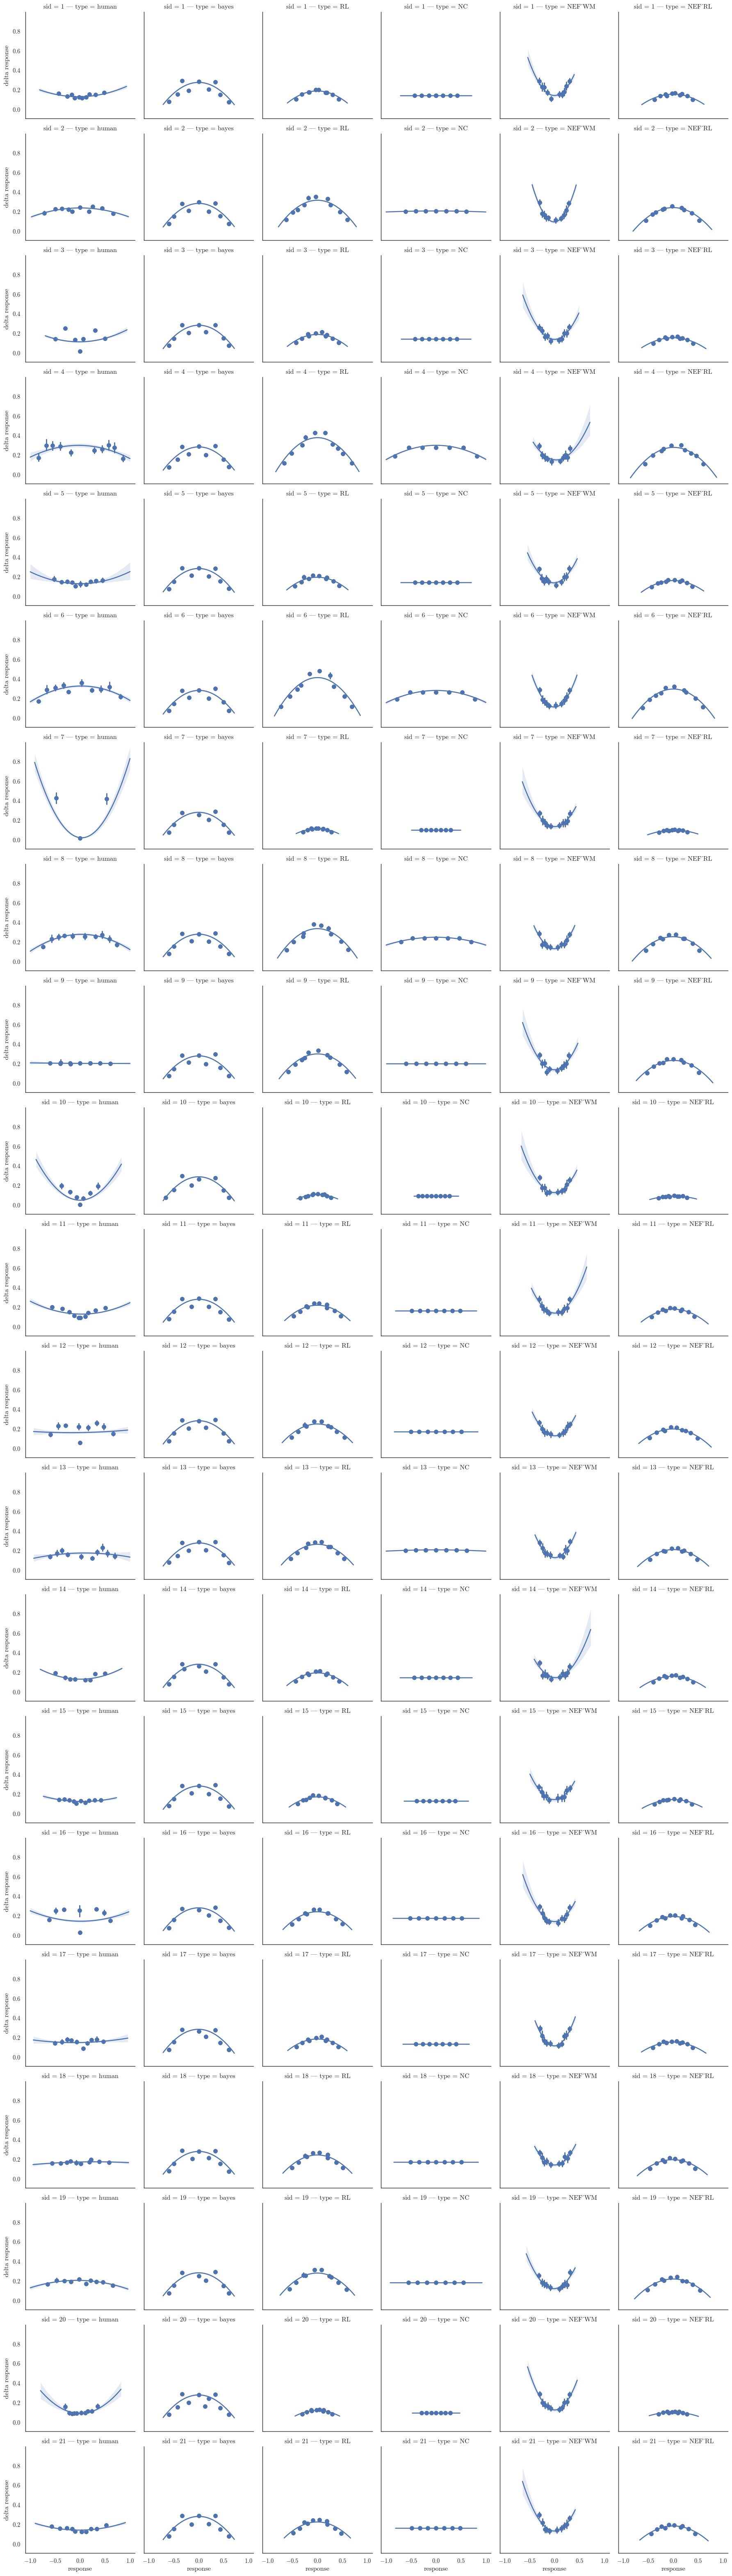

In [51]:
g = sns.FacetGrid(combined, row="sid", col='type')
g.map_dataframe(sns.regplot, x='response', y='delta response', x_bins=10, order=2)
# g.map_dataframe(sns.regplot, x='response', y='delta response', hue='stage', x_bins=10, order=2, palette=palette[:5])
# g.map_dataframe(sns.regplot, x='response', y='delta response', hue='stage', x_bins=10, order=2, palette=palette[:5])
# g.map_dataframe(sns.regplot, x='response', y='delta response', hue='stage', x_bins=10, order=2, palette=palette[:5])
# g.map_dataframe(sns.regplot, x='response', y='delta response', hue='stage', x_bins=10, order=2, palette=palette[:5])
# g.map_dataframe(sns.regplot, x='response', y='delta response', hue='stage', x_bins=10, order=2, palette=palette[:5])

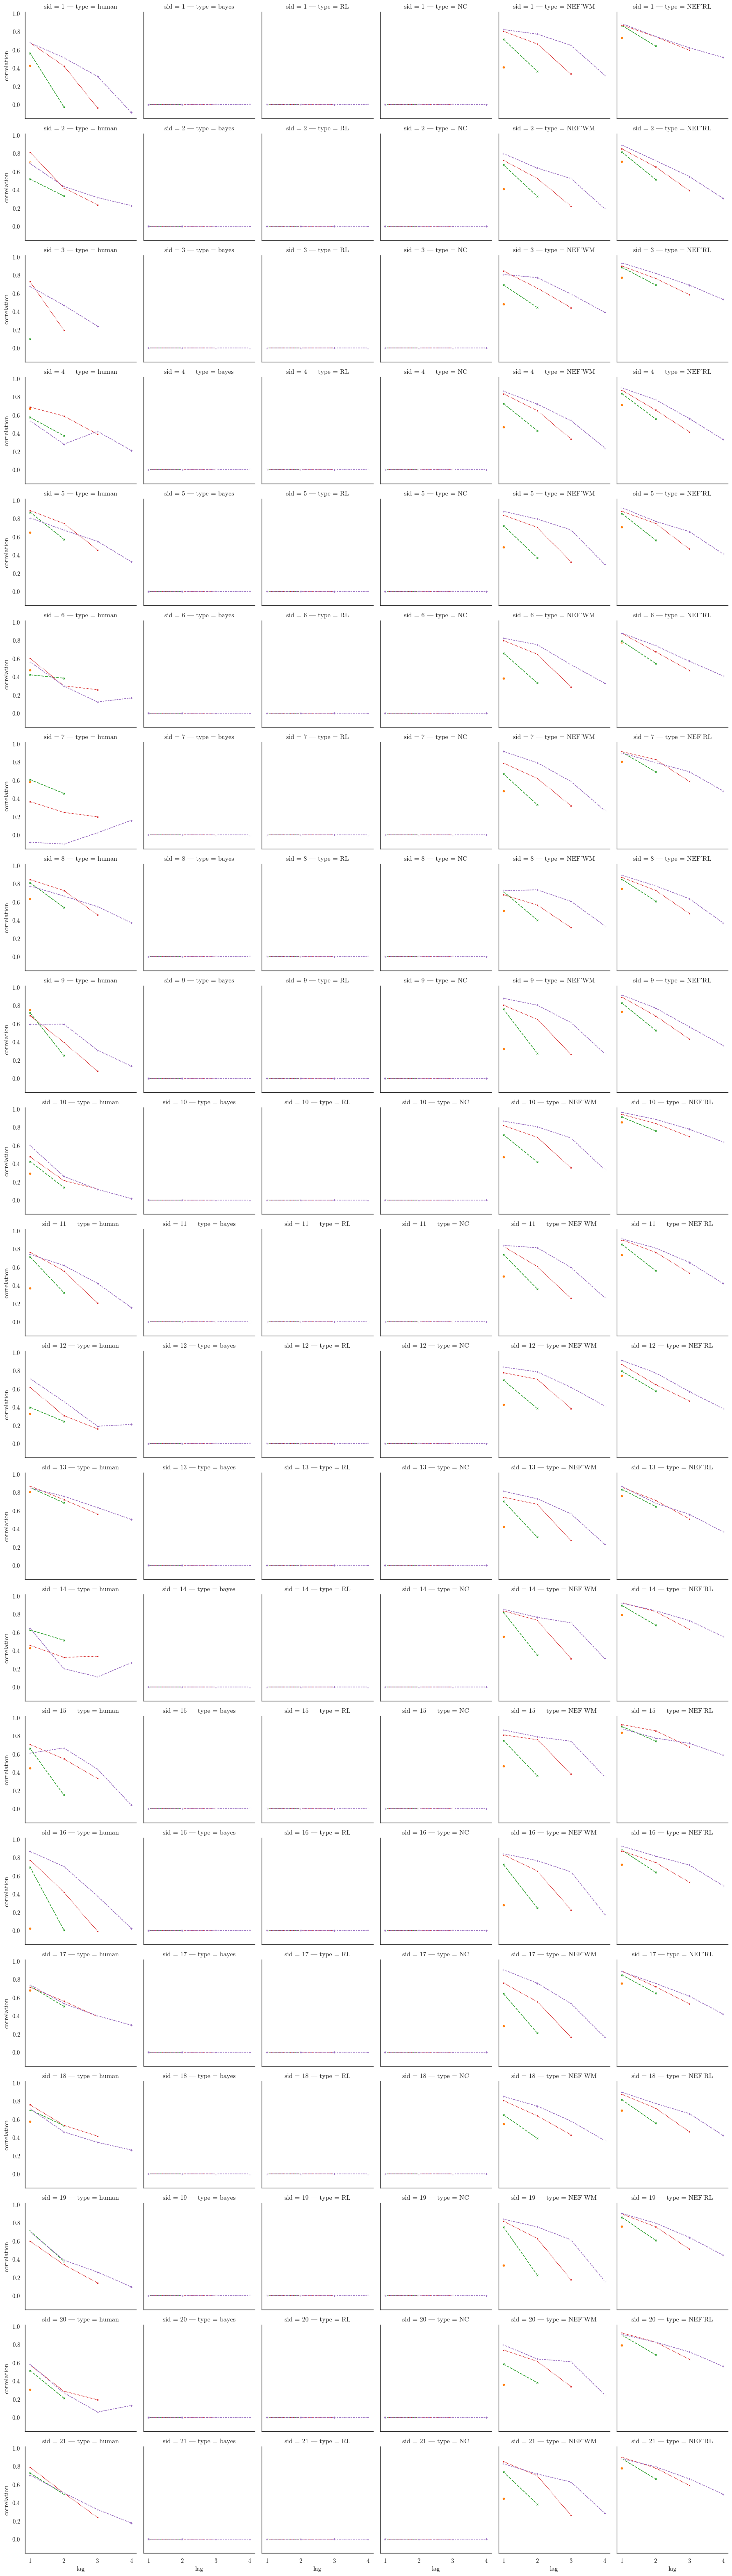

In [40]:
g = sns.FacetGrid(coefficients, row="sid", col='type')
g.map_dataframe(sns.lineplot, x='lag', y='correlation', hue='stage', palette=palette[1:5], markers=True, style='stage')